In [1]:
pip install tensorflow


In [11]:
pip install matplotlib

In [12]:
#imports
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Carregar e preparar o conjunto de dados
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

4422102/4422102 [==============================] - 1s 0us/step


In [4]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [5]:
# Construir o modelo
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [6]:
# Compilar o modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Treinar o modelo
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 46s 59ms/step - loss: 0.5766 - accuracy: 0.7904 - val_loss: 0.4017 - val_accuracy: 0.8584
Epoch 2/10
750/750 [==============================] - 47s 63ms/step - loss: 0.3641 - accuracy: 0.8688 - val_loss: 0.3499 - val_accuracy: 0.8737
Epoch 3/10
750/750 [==============================] - 44s 59ms/step - loss: 0.3133 - accuracy: 0.8869 - val_loss: 0.3138 - val_accuracy: 0.8867
Epoch 4/10
750/750 [==============================] - 44s 59ms/step - loss: 0.2790 - accuracy: 0.8989 - val_loss: 0.2837 - val_accuracy: 0.8957
Epoch 5/10
750/750 [==============================] - 44s 59ms/step - loss: 0.2537 - accuracy: 0.9073 - val_loss: 0.2703 - val_accuracy: 0.9027
Epoch 6/10
750/750 [==============================] - 44s 59ms/step - loss: 0.2336 - accuracy: 0.9158 - val_loss: 0.2685 - val_accuracy: 0.9028
Epoch 7/10
750/750 [==============================] - 44s 58ms/step - loss: 0.2157 - accuracy: 0.9213 - val_loss: 0.2683 - val_accuracy:

In [8]:
# Avaliar o modelo no conjunto de teste
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Acurácia no conjunto de teste: {test_acc}')

313/313 [==============================] - 3s 9ms/step - loss: 0.2675 - accuracy: 0.9124
Acurácia no conjunto de teste: 0.9124000072479248


In [9]:
# Fazer previsões em algumas imagens do conjunto de teste
predictions = model.predict(test_images[:5])

1/1 [==============================] - 0s 118ms/step


In [10]:
# Exibir as previsões e rótulos reais
for i in range(5):
    predicted_label = tf.argmax(predictions[i])
    true_label = tf.argmax(test_labels[i])
    print(f'Imagem {i + 1}: Predição={predicted_label}, Rótulo real={true_label}')

Imagem 1: Predição=9, Rótulo real=9
Imagem 2: Predição=2, Rótulo real=2
Imagem 3: Predição=1, Rótulo real=1
Imagem 4: Predição=1, Rótulo real=1
Imagem 5: Predição=6, Rótulo real=6


In [21]:
# Escolha um índice aleatório do conjunto de teste
index = np.random.randint(0, len(test_images))

In [22]:
# Obtenha a imagem e o rótulo correspondente
image = test_images[index]
true_label = np.argmax(test_labels[index])

In [23]:
# Faça a previsão para essa imagem
prediction = model.predict(np.expand_dims(image, axis=0))
predicted_label = np.argmax(prediction)

1/1 [==============================] - 0s 35ms/step


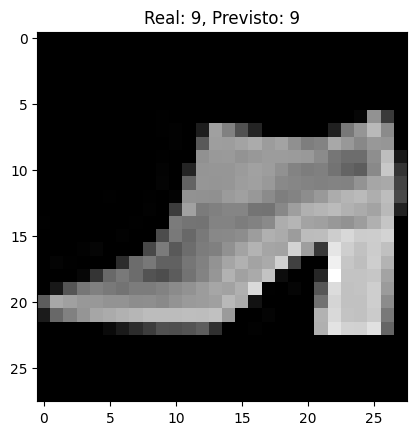

In [24]:
# Exiba a imagem
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f'Real: {true_label}, Previsto: {predicted_label}')
plt.show()